In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("white")
import glob
import json
import os
import sys
import shutil


In [5]:
def get_corr(x):
    df = pd.read_csv(x)
    model = x.split("_")[0]
    p = df.corr(method="pearson")["truth"][1]
    k = df.corr(method="kendall")["truth"][1]
    s = df.corr(method="spearman")["truth"][1]
    
    return {
        "model": model,
        "p": p,
        "k": k,
        "s": s
    }
    

dcorr = pd.DataFrame(list(map(get_corr, glob.glob("*_predictions.csv")))).sort_values(by="p", ascending=False)
d(dcorr)
print(dcorr.round(3).to_latex(index=False))

# remove the deeper inception v3 model, because it is just used for a comparison
dcorr = dcorr[dcorr["model"] != "deeper"]

,model,p,k,s
1,deeper,0.655278,0.459249,0.646601
7,MobileNetV2,0.635720,0.440198,0.630259
6,DenseNet121,0.615653,0.424737,0.606815
10,Xception,0.562095,0.376651,0.537982
0,vgg16,0.433075,0.282915,0.421834
5,vgg19,0.383514,0.270011,0.403809
2,ResNet50,0.126696,0.072250,0.111000
4,EfficientNetV2L,0.105479,0.064369,0.095268
9,MobileNetV3Large,0.049457,0.020269,0.027166
8,DenseNet201,-0.020399,0.125449,0.188405


\begin{tabular}{lrrr}
\toprule
           model &      p &     k &     s \\
\midrule
          deeper &  0.655 & 0.459 & 0.647 \\
     MobileNetV2 &  0.636 & 0.440 & 0.630 \\
     DenseNet121 &  0.616 & 0.425 & 0.607 \\
        Xception &  0.562 & 0.377 & 0.538 \\
           vgg16 &  0.433 & 0.283 & 0.422 \\
           vgg19 &  0.384 & 0.270 & 0.404 \\
        ResNet50 &  0.127 & 0.072 & 0.111 \\
 EfficientNetV2L &  0.105 & 0.064 & 0.095 \\
MobileNetV3Large &  0.049 & 0.020 & 0.027 \\
     DenseNet201 & -0.020 & 0.125 & 0.188 \\
     InceptionV3 & -0.084 & 0.101 & 0.127 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_465931/3437823771.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dcorr.round(3).to_latex(index=False))


,truth,prediction
0,0.336957,0.400222
1,0.648148,0.753712
2,0.642857,0.597984
3,0.637500,0.568115
4,0.583333,0.761660
...,...,...
252,0.134615,0.246850
253,0.465909,0.632763
254,0.578947,0.774025
255,0.521429,0.610615


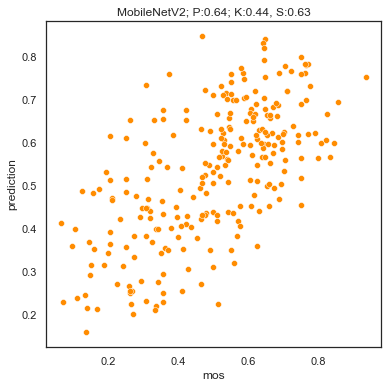

In [4]:
# read best performing model
best_model = dcorr.iloc[0]
best_model_name = best_model["model"]
dbest = pd.read_csv(best_model_name + "_predictions.csv")

d(dbest)

sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")


ax = sns.scatterplot(x="truth", y="prediction", data=dbest, color="darkorange")
ax.set_xlabel("mos")
ax.set_ylabel("prediction")

ax.set_title(best_model_name + "; P:{}; K:{}, S:{}".format(
        best_model["p"].round(2),
        best_model["k"].round(2),
        best_model["s"].round(2)
    )
)


ax.get_figure().savefig(
    "best_dnn_" + best_model_name + ".pdf", 
    bbox_inches="tight"
)
  